# MLOps Project: Brain MRI Analysis  

## Use Case Definition  

- **Topic:** Computer Vision  
- **Field of Application:** Healthcare  
- **Use Case Description:**  
  After exploring various datasets online for this end-of-semester project, I decided to cross-reference different data sources to address the following research question:  

  **How can one clearly determine whether an MRI scan provides evidence of a specific disease?**  

## Scope of the Project  

For this project, we focus on Brain MRI images related to:  

- **Normal brain scans**  
- **Brain Tumor Detection:**  
  - [Dataset 1](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)  
  - [Dataset 2](https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset)  
  - [Dataset 3 (Not included)](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation)  
- **Alzheimer’s Detection:**  
  - [Dataset](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset)  

## **Project Focus**

It is important to note that this project is primarily an **MLOps project** rather than a model performance-driven study. The emphasis is on:  

- Data collection and structuring
- Experiment Tracking with MLflow
- Model training pipeline automation  
- Deployment and reproducibility  

Accuracy, metrics, and model performance optimization were **not** the main objectives. Instead, the goal was to explore **workflow automation**.


# Data Collection


#### We've collected the dataset from KaggleHub and stored it locally for the first essay, in a folder called datasets_original.

In [ ]:
import shutil
import kagglehub

def download_and_move_dataset(dataset_name, target_directory):
    """
    Downloads a dataset using kagglehub and moves it to the specified directory.
    
    Parameters:
        dataset_name (str): The Kaggle dataset identifier (e.g., "uraninjo/augmented-alzheimer-mri-dataset").
        target_directory (str): The path to the directory where the dataset should be moved.
    
    Returns:
        str: The path to the dataset in the new location.
    """
    # Ensure the target directory exists
    os.makedirs(target_directory, exist_ok=True)

    # Download the dataset to the default location
    default_path = kagglehub.dataset_download(dataset_name)

    # Extract the dataset folder name
    dataset_name_only = os.path.basename(default_path.split("/")[-3])
    # dataset_name_only = os.path.basename(default_path.rstrip("/"))

    # Define the new path
    new_path = os.path.join(target_directory, dataset_name_only)

    # Move the dataset to the new location
    shutil.move(default_path, new_path)

    return new_path


/Users/jonathan/Documents/École/Paris 8/S1/Outils de programmation avancée pour l’IA/.tf_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Dedicated directory to store all datasets
if not datasets_exist:
    base_directory = os.path.join(os.getcwd(), "datasets_original")
    os.makedirs(base_directory, exist_ok=True)

    # Download and move datasets
    datasets = {
        "navoneel/brain-mri-images-for-brain-tumor-detection": "BrainTumorDetection",  # Contains 2 dirs no/yes
        "preetviradiya/brian-tumor-dataset": "BrainTumorDataset", # Contains 2 dirs 'Brain Tumor/Healthy'
        "uraninjo/augmented-alzheimer-mri-dataset": "AugmentedAlzheimerDataset" # Contain 4 dirs "Mild Demented / Moderate Demented/ Non Demented /Very Mild Demented"
    }

    paths = []

    for dataset_name, subfolder in datasets.items():
        # subfolder = subfolder.split('/')#[-1]
        # print(subfolder)
        # break
        target_dir = os.path.join(base_directory, subfolder)
        moved_path = download_and_move_dataset(dataset_name, target_dir)
        paths.append(moved_path)
        print(f"✅ Dataset '{dataset_name}' moved to: {moved_path}\n")

    # Output the paths of all moved datasets
    print("All datasets have been downloaded and moved:")
    for path in paths:
        print(path)
else : 
    print(f"✅ All those item to be download have already been downloaded!!!\n")

✅ All those item to be download have already been downloaded!!!



We now want a more structured dataset, so we proceed with data structuring and store it in the datasets_original_cleaned directory. The desired structure is as follows:

    datasets_original_cleaned/
    ├── BrainTumorDetection/
    │   ├── no/
    │   ├── yes/
    ├── BrainTumorDataset/
    │   ├── Brain Tumor/
    │   ├── Healthy/
    ├── AugmentedAlzheimerDataset/
        ├── Mild Demented/
        ├── Moderate Demented/
        ├── Non Demented/
        ├── Very Mild Demented/


 **Cleaning directories**
 
move the content of 
- "Project/datasets_original/AugmentedAlzheimerDataset/augmented-alzheimer-mri-dataset" to "Project/datasets_original_cleaned/AugmentedAlzheimerDataset"
- "Project/datasets_original/BrainTumorDataset/brian-tumor-dataset" to "Project/datasets_original_cleaned/BrainTumorDataset"
- "Project/datasets_original/BrainTumorDetection/brain-mri-images-for-brain-tumor-detection" to "Project/datasets_original_cleaned/BrainTumorDetection"

In [ ]:
def move_contents(src_dir, dest_dir):
    """
    Moves all contents from the source directory to the destination directory.
    
    Parameters:
        src_dir (str): Path to the source directory.
        dest_dir (str): Path to the destination directory.
    """
    # Ensure the source directory exists
    if not os.path.exists(src_dir):
        print(f"Source directory does not exist: {src_dir}")
        return
    
    # Ensure the destination directory exists
    os.makedirs(dest_dir, exist_ok=True)

    # Move each item in the source directory to the destination
    for item in os.listdir(src_dir):
        src_item = os.path.join(src_dir, item)
        dest_item = os.path.join(dest_dir, item)
        shutil.move(src_item, dest_item)
        print(f"Moved: {src_item} -> {dest_item}")

    # # Remove the now-empty source directory
    # os.rmdir(src_dir)
    # print(f"Removed empty directory: {src_dir}")


    # Paths
    base_dir = os.path.join(os.getcwd(), "datasets_original")
    base_dir_cleaned = os.path.join(os.getcwd(), "datasets_original_cleaned")
    directories_to_clean = {
        "AugmentedAlzheimerDataset/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset": "AugmentedAlzheimerDataset",
        "BrainTumorDataset/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set": "BrainTumorDataset",
        "BrainTumorDetection/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset": "BrainTumorDetection",
    }

    # Move contents as per mapping
    for src_suffix, dest_suffix in directories_to_clean.items():
        src_path = os.path.join(base_dir, src_suffix)
        dest_path = os.path.join(base_dir_cleaned, dest_suffix)
        move_contents(src_path, dest_path)

    # Forcefully delete the datasets_original directory to free up space
    try:
        shutil.rmtree(base_dir)
        print(f"Forcefully removed directory: {base_dir}")
    except Exception as e:
        print(f"Error while removing directory {base_dir}: {e}")

### Building an exploitable datasource

The expected data source structure we will work with : 

    data/
    ├── brain_tumor_detection/   # from: datasets_original_cleaned/BrainTumorDetection/ & datasets_original_cleaned BrainTumorDataset/
    │   ├── healthy_brain/       # from: no and healthy directories images
    │   ├── brain_tumor/         # from: yes and Brain Tumor directories images
    ├── alzheimer_detection/     # from: datasets_original_cleaned/AugmentedAlzheimerDataset/
        ├── non_demented_brain/  # from: Non Demented directory images only
        ├── demented_brain/      # from: All other demented directories images


- Processing to be done on directory for : **Augmented Alzheimer MRI Dataset**
    - Considere only augmented images 
    - group images only in two directory (demented/non_demented)
        - demented : Should contain images for all other class than non_demented
        - non_demented Only non-demented images

In [ ]:
def restructure_dataset_precise(src_base_dir, dest_base_dir):
    """
    Restructures the dataset directories into the specified format and ensures uniform naming of images.

    Parameters:
        src_base_dir (str): Path to the source dataset directory (datasets_original_cleaned).
        dest_base_dir (str): Path to the destination dataset directory (data).
    """
    # Ensure destination base directory exists
    os.makedirs(dest_base_dir, exist_ok=True)

    # Brain Tumor Detection
    src_brain_tumor_detection = os.path.join(src_base_dir, "BrainTumorDetection")
    src_brain_tumor_dataset = os.path.join(src_base_dir, "BrainTumorDataset")
    dest_brain_tumor_detection = os.path.join(dest_base_dir, "brain_tumor_detection")

    healthy_brain_dir = os.path.join(dest_brain_tumor_detection, "healthy_brain")
    brain_tumor_dir = os.path.join(dest_brain_tumor_detection, "brain_tumor")

    os.makedirs(healthy_brain_dir, exist_ok=True)
    os.makedirs(brain_tumor_dir, exist_ok=True)

    # Function to rename and copy images with a uniform naming convention
    def copy_and_rename_images(src_dir, target_dir, prefix):
        count = 1
        for item in os.listdir(src_dir):
            # Construct full path of the image
            src_item = os.path.join(src_dir, item)
            if os.path.isfile(src_item):
                # Generate new filename
                new_name = f"{prefix}_{count}.jpg"  # Ensure the extension is consistent (e.g., .jpg)
                target_item = os.path.join(target_dir, new_name)

                # Copy and rename the image
                shutil.copy(src_item, target_item)
                print(f"✅ Copied and renamed {src_item} to {target_item}")
                count += 1

    # Copy and rename Brain Tumor Detection images
    for src_dir, target_dir, prefix in [
        (os.path.join(src_brain_tumor_detection, "no"), healthy_brain_dir, "healthy_brain"),
        (os.path.join(src_brain_tumor_detection, "yes"), brain_tumor_dir, "brain_tumor"),
        (os.path.join(src_brain_tumor_dataset, "Healthy"), healthy_brain_dir, "healthy_brain"),
        (os.path.join(src_brain_tumor_dataset, "Brain Tumor"), brain_tumor_dir, "brain_tumor")
    ]:
        if os.path.exists(src_dir):
            print(f"🔍 Found {src_dir}")
            copy_and_rename_images(src_dir, target_dir, prefix)
        else:
            print(f"❌ Directory {src_dir} not found!")

    # Alzheimer Detection
    src_alzheimer_detection = os.path.join(src_base_dir, "AugmentedAlzheimerDataset")
    dest_alzheimer_detection = os.path.join(dest_base_dir, "alzheimer_detection")

    non_demented_dir = os.path.join(dest_alzheimer_detection, "non_demented_brain")
    demented_dir = os.path.join(dest_alzheimer_detection, "demented_brain")

    os.makedirs(non_demented_dir, exist_ok=True)
    os.makedirs(demented_dir, exist_ok=True)

    # Copy and rename Alzheimer's images
    for label, prefix in [
        ("NonDemented", "non_demented_brain"),
        ("MildDemented", "demented_brain"),
        ("ModerateDemented", "demented_brain"),
        ("VeryMildDemented", "demented_brain")
    ]:
        src_dir = os.path.join(src_alzheimer_detection, label)
        target_dir = non_demented_dir if label == "NonDemented" else demented_dir
        if os.path.exists(src_dir):
            print(f"🔍 Found {src_dir}")
            copy_and_rename_images(src_dir, target_dir, prefix)
        else:
            print(f"❌ Directory {src_dir} not found!")

    print("✅ Restructuring and renaming completed.🥳!!")

# Example usage:
src_base_dir = os.path.join(os.getcwd(), "datasets_original_cleaned/")
dest_base_dir = os.path.join(os.getcwd(), "data/")

directory = "datasets_original_cleaned"
datasource_exist = is_dir_not_empty(dest_base_dir)

if not datasource_exist:
    print(f"≪ Source directory: {src_base_dir}")
    print(f"≫ Destination directory: {dest_base_dir}\n")
    restructure_dataset_precise(src_base_dir, dest_base_dir)
else : 
    print(f"✅ The source directory has already been restructure!!!\n")


✅ The source directory has already been restructure!!!



# Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
from tqdm import tqdm
import math

### Pre-processing to normalize images

In [ ]:


def calculate_max_dimensions(src_dir):
    """
    Calculates the maximum width and height of images in the directory.

    Parameters:
        src_dir (str): Path to the source directory.

    Returns:
        tuple: Maximum width and height of the images.
    """
    max_width, max_height = 0, 0

    for subdir, _, files in os.walk(src_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            image = cv2.imread(file_path)
            if image is not None:
                h, w, _ = image.shape
                max_width = max(max_width, w)
                max_height = max(max_height, h)

    return max_width, max_height

def normalize_and_pad_images(src_dir, target_dir, max_size=None, file_format=".jpg"):
    """
    Normalizes images to a uniform size with padding to maintain aspect ratio.

    Parameters:
        src_dir (str): Path to the source directory containing images.
        target_dir (str): Path to the target directory where normalized images will be saved.
        max_size (tuple): Maximum width and height for images (optional).
        file_format (str): Target image file format (e.g., ".jpg", ".png").
    """
    os.makedirs(target_dir, exist_ok=True)

    # Calculate maximum dimensions if not provided
    if not max_size:
        max_width, max_height = calculate_max_dimensions(src_dir)
    else:
        max_width, max_height = max_size

    for subdir, _, files in os.walk(src_dir):
        relative_path = os.path.relpath(subdir, src_dir)
        dest_subdir = os.path.join(target_dir, relative_path)
        os.makedirs(dest_subdir, exist_ok=True)

        for file in tqdm(files, desc=f"Processing {relative_path}"):
            file_path = os.path.join(subdir, file)
            image = cv2.imread(file_path)

            if image is not None:
                h, w, c = image.shape

                # Resize image while maintaining aspect ratio
                scale = min(max_width / w, max_height / h)
                new_w = int(w * scale)
                new_h = int(h * scale)
                resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

                # Calculate padding to center the image
                top_pad = (max_height - new_h) // 2
                bottom_pad = max_height - new_h - top_pad
                left_pad = (max_width - new_w) // 2
                right_pad = max_width - new_w - left_pad

                # Pad the resized image
                padded_image = cv2.copyMakeBorder(
                    resized_image, top_pad, bottom_pad, left_pad, right_pad,
                    borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]
                )

                # Save the padded image
                dest_file_name = os.path.splitext(file)[0] + file_format
                dest_file_path = os.path.join(dest_subdir, dest_file_name)
                cv2.imwrite(dest_file_path, padded_image)

    print(f"✅ All images normalized and saved to {target_dir}")


# Define paths
src_data_dir = "data"  
normalized_data_dir = "data_normalized"  # Directory to save normalized images

datasource_exist = is_dir_not_empty(normalized_data_dir)

if not datasource_exist:
    # Normalize and pad images
    normalize_and_pad_images(src_data_dir, normalized_data_dir, max_size=None)
else : 
    print(f"✅ The source directory has already been normalized!!!\n")

✅ The source directory has already been normalized!!!



In [ ]:
# Helper function to plot images

def display_images_from_directory(directory, title, max_images=16, figsize=(12, 12), image_size=(512, 512)):
    """
    Displays images from a directory in a grid format with resizing options.

    Parameters:
        directory (str): Path to the directory containing images.
        title (str): Title for the entire plot.
        max_images (int): Maximum number of images to display.
        figsize (tuple): Size of the entire figure (width, height).
        image_size (tuple): Size to which each image should be resized.
    """
    # List all image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('jpg', 'png', 'jpeg', 'bmp', 'tiff'))]
    image_files = image_files[:min(len(image_files), max_images)]  # Limit to max_images

    # Derive grid size dynamically based on max_images
    n_images = len(image_files)
    n_cols = math.ceil(math.sqrt(n_images))  # Calculate the number of columns (square root approach)
    n_rows = math.ceil(n_images / n_cols)  # Calculate the number of rows

    # Create the subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle(title, fontsize=16)  # Adjust the position of the main title
    
    # Display images in the grid
    for i, ax in enumerate(axes.ravel()):
        if i < n_images:
            img_path = os.path.join(directory, image_files[i])
            image = cv2.imread(img_path)
            
            # Resize the image
            if image_size:
                image = cv2.resize(image, image_size)
            
            # Convert BGR (OpenCV) to RGB for proper display in Matplotlib
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            ax.imshow(image)
            ax.set_title(image_files[i], fontsize=8, pad=4)  # Smaller font size and added padding
            ax.axis('off')  # Hide axes
        else:
            ax.axis('off')  # Hide unused subplots
    
    # Adjust layout and spacing to avoid overlapping
    # plt.tight_layout(rect=[0, 0, 0, 0])
    # plt.subplots_adjust(hspace=None, wspace=0.02)  # Add space between subplots
    plt.show()


# 1. Check Dataset Size (Number of images per class)

def dataset_size(directory):
    """
    Count the number of images in each folder inside the given directory.

    Parameters:
        directory (str): Path to the parent directory containing class folders.

    Returns:
        dict: A dictionary with class names as keys and the count of images as values.
    """
    return {folder: len(os.listdir(os.path.join(directory, folder))) for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))}


# 2. Plot Distribution of Images with Count and Percentage Tags

def plot_class_distribution(class_count, class_name: str):
    classes = list(class_count.keys())
    counts = list(class_count.values())
    total = sum(counts)  # Total number of images to calculate percentage

    # Create a color palette (you can choose other color maps or predefined color lists)
    colors = plt.cm.get_cmap('tab10', len(classes))  # 'tab10' is a color map with 10 colors
    color_list = [colors(i) for i in range(len(classes))]  # Assign colors to each class

    plt.figure(figsize=(8, 6))
    bars = plt.bar(classes, counts, color=color_list)

    # Add title and labels
    plt.title(f'"{class_name}" Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)

    # Add tags/annotations in the format (count (percentage))
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        percentage = (yval / total) * 100  # Calculate the percentage
        tag = f"{int(yval)} ({percentage:.2f}%)"  # Format as count (percentage)
        
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x-position (center of the bar)
            yval,  # y-position (height of the bar)
            tag,  # The formatted tag
            ha='center',  # Horizontal alignment (centered on the bar)
            va='bottom',  # Vertical alignment (on top of the bar)
            fontsize=10,
            color='black'
        )

    plt.show()



### Check Dataset Size:

How many images are there in each class (healthy_brain, brain_tumor, non_demented_brain, demented_brain)?


/var/folders/bw/99zpkjs138d1s9g1c411hty80000gn/T/ipykernel_6470/1481102777.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))  # 'tab10' is a color map with 10 colors


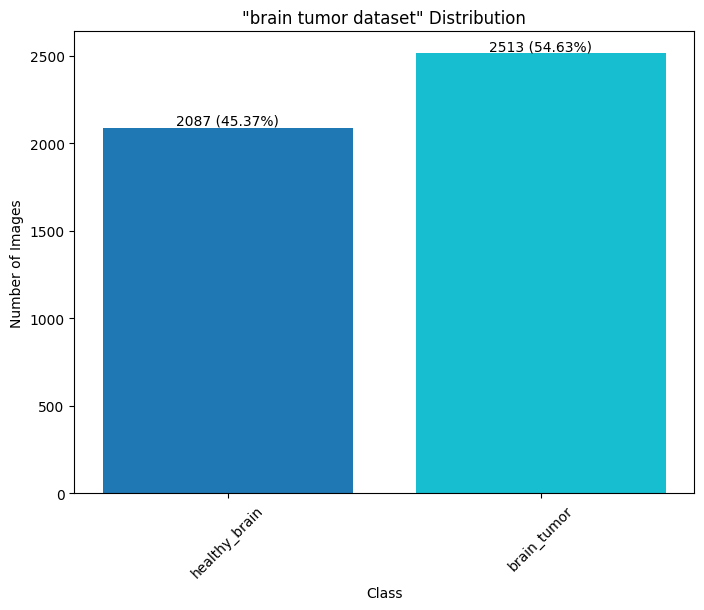

Displaying images from 'healthy_brain'...


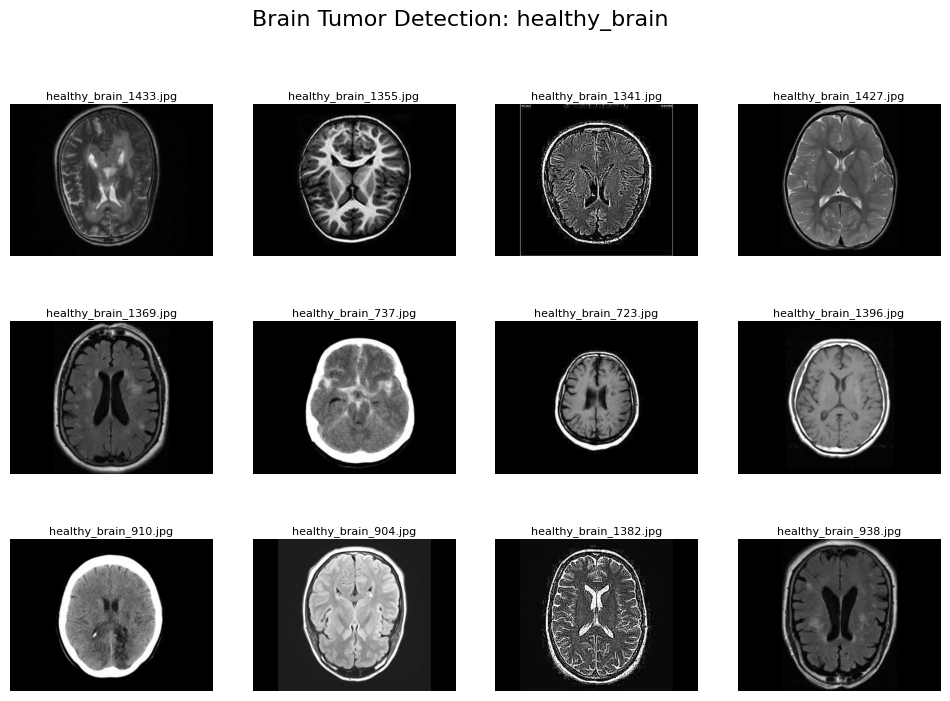

Displaying images from 'brain_tumor'...


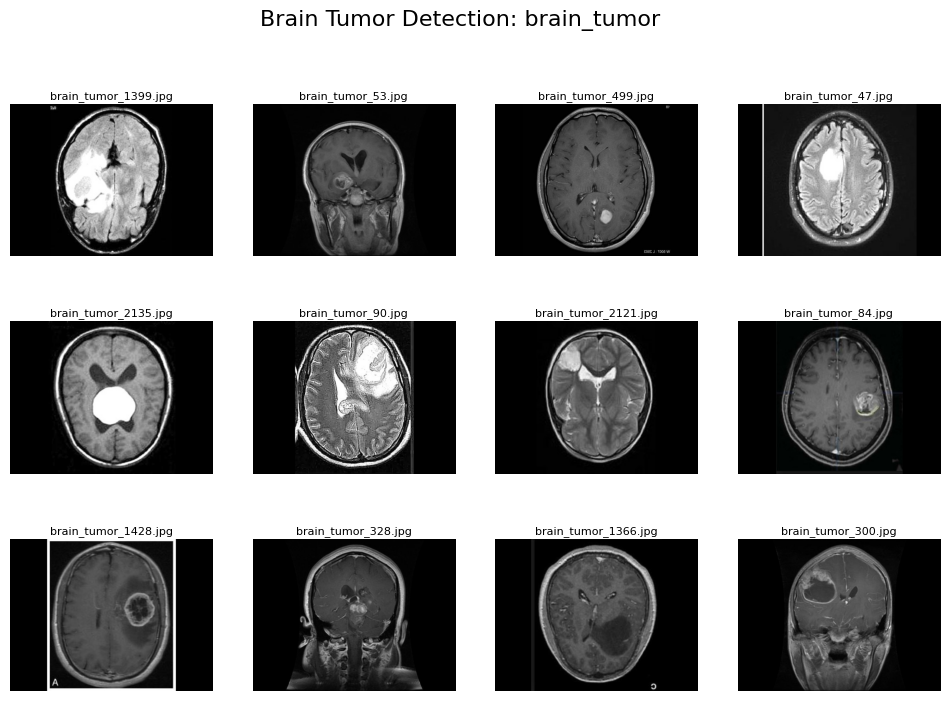

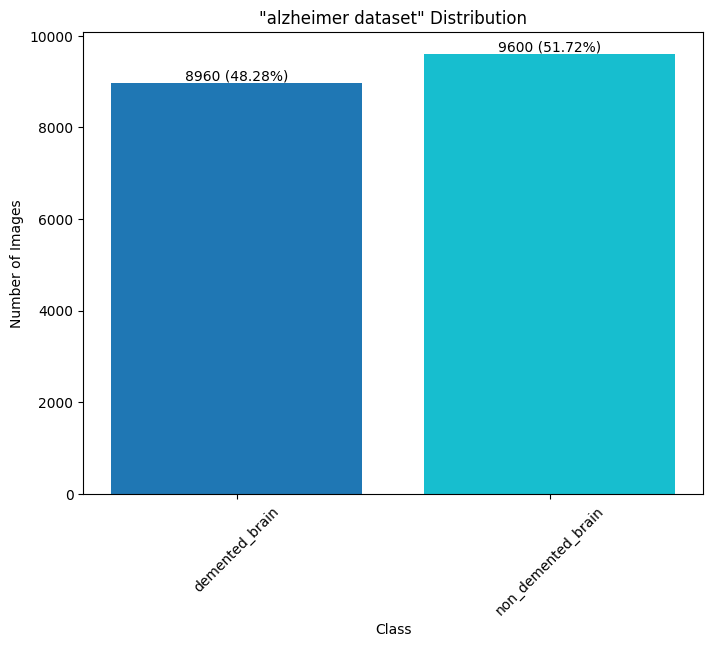

Displaying images from 'non_demented_brain'...


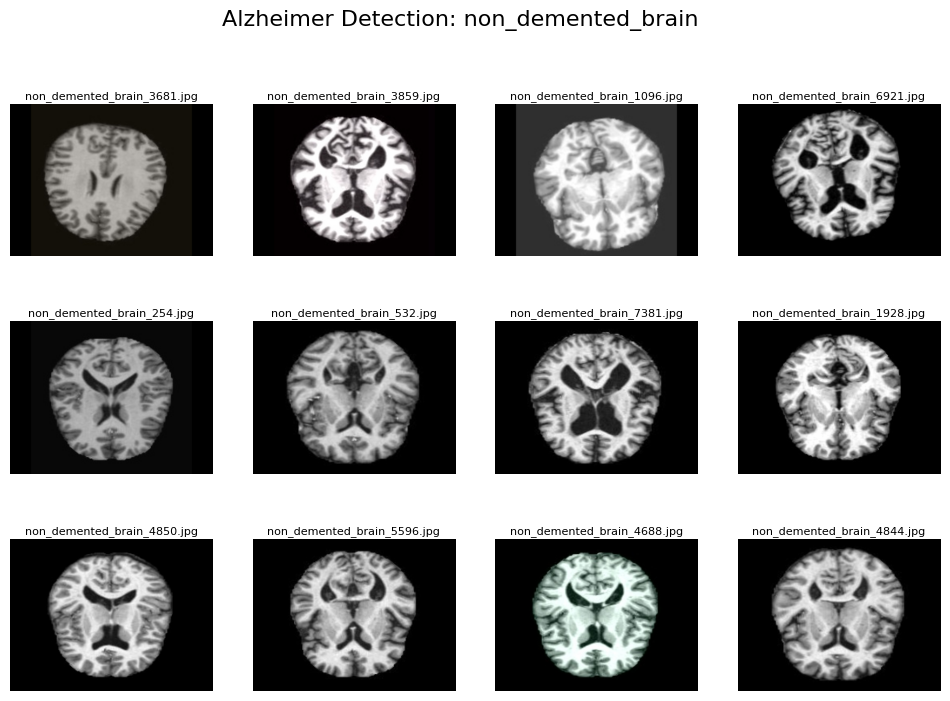

Displaying images from 'demented_brain'...


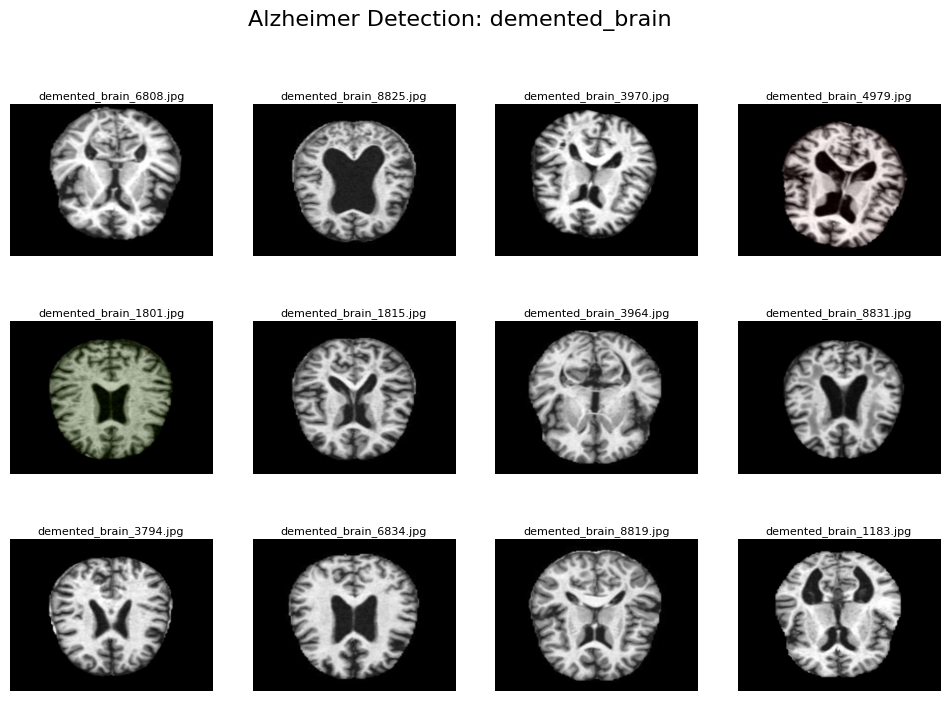

In [ ]:
# Define directories and parameters in a dictionary for easier modification
data_dir = normalized_data_dir 
directories = {
    "brain_tumor_detection": {
        "healthy_brain": os.path.join(data_dir, "brain_tumor_detection", "healthy_brain"),
        "brain_tumor": os.path.join(data_dir, "brain_tumor_detection", "brain_tumor")
    },
    "alzheimer_detection": {
        "non_demented_brain": os.path.join(data_dir, "alzheimer_detection", "non_demented_brain"),
        "demented_brain": os.path.join(data_dir, "alzheimer_detection", "demented_brain")
    }
}
data_dir = normalized_data_dir

brain_tumor_detection_dir = os.path.join(data_dir, "brain_tumor_detection")
healthy_brain_dir = os.path.join(brain_tumor_detection_dir, "healthy_brain")
brain_tumor_dir = os.path.join(brain_tumor_detection_dir, "brain_tumor")

alzheimer_detection_dir = os.path.join(data_dir, "alzheimer_detection")
non_demented_brain_dir = os.path.join(alzheimer_detection_dir, "non_demented_brain")
demented_brain_dir = os.path.join(alzheimer_detection_dir, "demented_brain")

# Parameters for displaying images (example)
n_images = 12  # Number of images to display
image_size = None#(128, 128)  # Resize images to this size
grid_size = None # A tuple (nrows, ncols)
figsize=(12, 8)

# Explore brain_tumor_detection directory
# brain_tumor_detection_dir = directories["brain_tumor_detection"]
class_count_tumor = dataset_size(brain_tumor_detection_dir)
plot_class_distribution(class_count_tumor, class_name='brain tumor dataset')

# Check image preview from healthy_brain and brain_tumor
for category, path in directories["brain_tumor_detection"].items():
    if os.path.exists(path) and os.listdir(path):
        print(f"Displaying images from '{category}'...")
        display_images_from_directory(path, title=f"Brain Tumor Detection: {category}", max_images=n_images, image_size=image_size, figsize=figsize)

# Explore alzheimer_detection directory
# alzheimer_detection_dir = directories["alzheimer_detection"]
class_count_alzheimer = dataset_size(alzheimer_detection_dir)
plot_class_distribution(class_count_alzheimer, class_name='alzheimer dataset')

# Check image preview from non_demented_brain and demented_brain
for category, path in directories["alzheimer_detection"].items():
    if os.path.exists(path) and os.listdir(path):
        print(f"Displaying images from '{category}'...")
        display_images_from_directory(path, title=f"Alzheimer Detection: {category}", max_images=n_images, image_size=image_size, figsize=figsize)


In [ ]:
tumor_img_count = sum(class_count_tumor.values())
alzheimer_img_count = sum(class_count_alzheimer.values())

print(f"""📍*****| Dataset recap total counts|*****📍\n Brain Tumor dataset: {tumor_img_count}\n Alzheimer dataset: {alzheimer_img_count}""")

📍*****| Dataset recap total counts|*****📍
 Brain Tumor dataset: 4600
 Alzheimer dataset: 18560


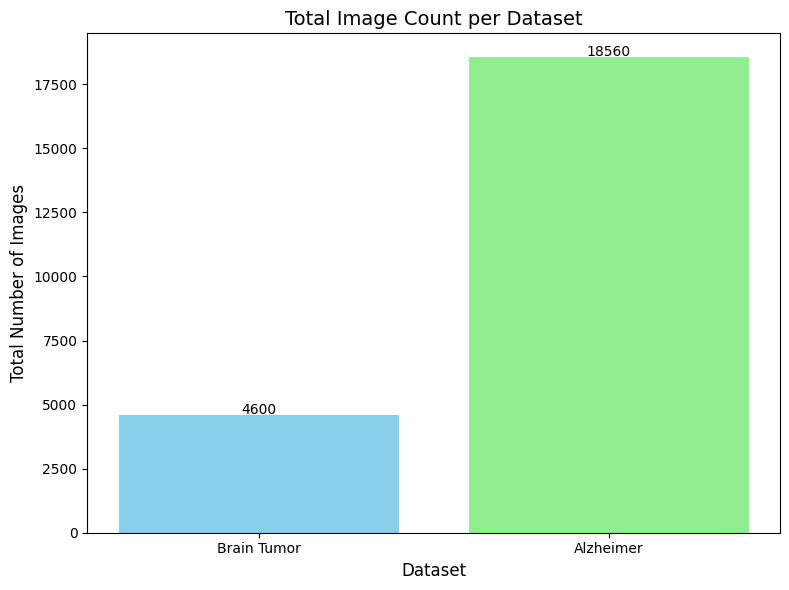

📍*****| Dataset recap total counts|*****📍
 Brain Tumor dataset: 4600
 Alzheimer dataset: 18560


In [ ]:

# Prepare data for plotting
datasets = ['Brain Tumor', 'Alzheimer']
counts = [tumor_img_count, alzheimer_img_count]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(datasets, counts, color=['skyblue', 'lightgreen'])

# Add titles and labels
plt.title('Total Image Count per Dataset', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Total Number of Images', fontsize=12)

# Display the total counts on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 50, f'{count}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Print total counts recap
print(f"""📍*****| Dataset recap total counts|*****📍\n Brain Tumor dataset: {tumor_img_count}\n Alzheimer dataset: {alzheimer_img_count}""")


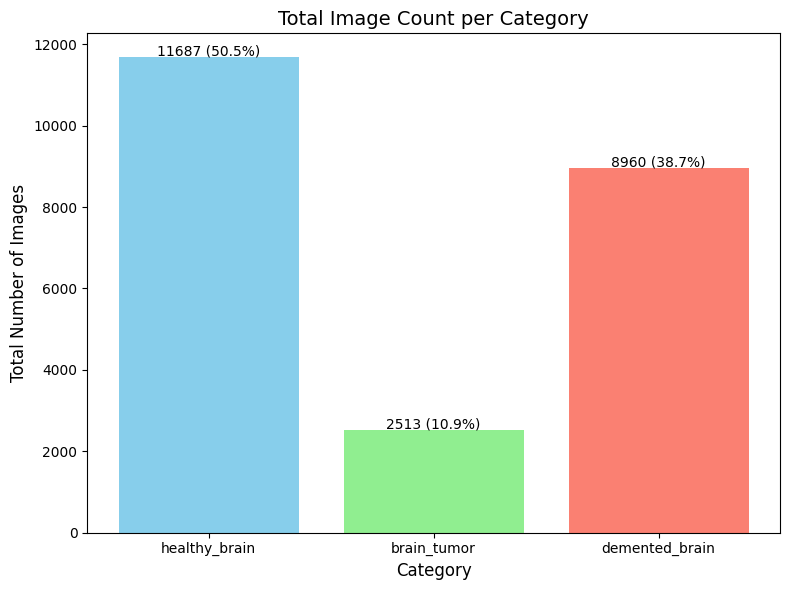

📍*****| Detailed Dataset Recap|*****📍
 Healthy Brain: 11687 (50.5%)
 Brain Tumor: 2513 (10.9%)
 Demented Brain: 8960 (38.7%)


In [ ]:
global_detailled_count = {
    'healthy_brain': class_count_tumor['healthy_brain'] + class_count_alzheimer['non_demented_brain'], 
    'brain_tumor': class_count_tumor['brain_tumor'], 
    'demented_brain': class_count_alzheimer['demented_brain']
}

# Calculate the total number of images across all categories
total_images = sum(global_detailled_count.values())

# Prepare data for plotting
categories = list(global_detailled_count.keys())
counts = list(global_detailled_count.values())
percentages = [(count / total_images) * 100 for count in counts]  # Calculate percentage for each category

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'salmon'])

# Add titles and labels
plt.title('Total Image Count per Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Number of Images', fontsize=12)

# Display the total counts and percentages on top of the bars
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 50, f'{count} ({percentage:.1f}%)', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Print detailed dataset recap with percentages
print(f"""📍*****| Detailed Dataset Recap|*****📍
 Healthy Brain: {global_detailled_count['healthy_brain']} ({percentages[0]:.1f}%)
 Brain Tumor: {global_detailled_count['brain_tumor']} ({percentages[1]:.1f}%)
 Demented Brain: {global_detailled_count['demented_brain']} ({percentages[2]:.1f}%)""")


**`📝 Comment:`** Data distribution

After this first exploration stage, we can notice that:
- we have a unbalanced data source in term of `global dataset count`
- In speaking of subcategories of each dataset, they are quite well distributed (balanced). 

### Final dataset construction

`Next steps:` Final dataset generation

As a reminder the research question we would like to answer in this worlk is : 
- `Research question`: How can one clearly say that a certain MRI is displaying evidence of specific desease?

For this end, we are going to build a final dataset that will contain 3 classes: 
- healthy_brain
- tumor_brain
- alzheimer_brain

Since the `healthy_brain` class is the class with the highest count of sample (healthy_brain + non_demented images), and that the `tumor_brain` is the small set, the final dataset we are about to build will have its count of sample, and the two other class will be constructed  by `random samplying their images to lowersample them to match the `tumor_brain` class`

In [ ]:
# Create new directories for the final dataset
final_dataset_dir = os.path.join("final_dataset")
healthy_brain_final_dir = os.path.join(final_dataset_dir, "healthy_brain")
tumor_brain_final_dir = os.path.join(final_dataset_dir, "tumor_brain")
alzheimer_brain_final_dir = os.path.join(final_dataset_dir, "alzheimer_brain")

# Create directories if they don't exist
os.makedirs(healthy_brain_final_dir, exist_ok=True)
os.makedirs(tumor_brain_final_dir, exist_ok=True)
os.makedirs(alzheimer_brain_final_dir, exist_ok=True)

datasource_exist = is_dir_not_empty(final_dataset_dir)

if not datasource_exist:
    # List the images in each category and make sure to preserve the full paths
    healthy_brain_images = [os.path.join(healthy_brain_dir, f) for f in os.listdir(healthy_brain_dir) if f.lower().endswith(('jpg', 'png', 'jpeg'))]
    non_demented_brain_images = [os.path.join(non_demented_brain_dir, f) for f in os.listdir(non_demented_brain_dir) if f.lower().endswith(('jpg', 'png', 'jpeg'))]
    tumor_brain_images = [os.path.join(brain_tumor_dir, f) for f in os.listdir(brain_tumor_dir) if f.lower().endswith(('jpg', 'png', 'jpeg'))]
    demented_brain_images = [os.path.join(demented_brain_dir, f) for f in os.listdir(demented_brain_dir) if f.lower().endswith(('jpg', 'png', 'jpeg'))]

    # Combine healthy_brain and non_demented_brain images, preserving the full file path
    healthy_brain_combined = healthy_brain_images + non_demented_brain_images

    # Get the size of the smallest class (tumor_brain)
    min_class_size = len(tumor_brain_images)

    # Ensure enough samples are available for healthy and alzheimer brains
    if len(healthy_brain_combined) < min_class_size:
        print(f"Warning: Not enough healthy brain images for sampling. Found {len(healthy_brain_combined)} images.")
        healthy_brain_sampled = healthy_brain_combined  # Take all images if not enough for sampling
    else:
        healthy_brain_sampled = random.sample(healthy_brain_combined, min_class_size)

    if len(demented_brain_images) < min_class_size:
        print(f"Warning: Not enough alzheimer brain images for sampling. Found {len(demented_brain_images)} images.")
        alzheimer_brain_sampled = demented_brain_images  # Take all images if not enough for sampling
    else:
        alzheimer_brain_sampled = random.sample(demented_brain_images, min_class_size)

    # Function to copy images to the new directory with uniform naming
    def copy_images(image_list, destination_dir, prefix):
        missing_files = []
        for idx, image in enumerate(image_list, 1):  # Start indexing from 1
            if os.path.exists(image):  # Check if the source file exists
                new_filename = f"{prefix}_{idx}.jpg"  # Uniform naming
                dest_path = os.path.join(destination_dir, new_filename)
                shutil.copy(image, dest_path)
            else:
                missing_files.append(image)
        
        if missing_files:
            print(f"Warning: The following files were not found:\n{', '.join(missing_files)}")

    # Copy only the sampled images to the new directories (not the full `healthy_brain_combined`)
    copy_images(healthy_brain_sampled, healthy_brain_final_dir, "healthy_brain")
    copy_images(tumor_brain_images, tumor_brain_final_dir, "tumor_brain")  # No need to sample since it's already the smallest class
    copy_images(alzheimer_brain_sampled, alzheimer_brain_final_dir, "alzheimer_brain")

    # Print the final dataset summary
    print(f"Final dataset summary:")
    print(f"Healthy brain images: {len(healthy_brain_sampled)}")
    print(f"Tumor brain images: {len(tumor_brain_images)}")
    print(f"Alzheimer brain images: {len(alzheimer_brain_sampled)}")
else : 
    print(f"✅ The final dataset has already been build!!!\n")
    print(f"Final dataset summary:")
    # Check the final dataset directory structure
    for category in ["healthy_brain", "tumor_brain", "alzheimer_brain"]:
        print(f"{category} final count: {len(os.listdir(os.path.join(final_dataset_dir, category)))}")


✅ The final dataset has already been build!!!

Final dataset summary:
healthy_brain final count: 2513
tumor_brain final count: 2513
alzheimer_brain final count: 2513


Displaying images from 'healthy_brain'...


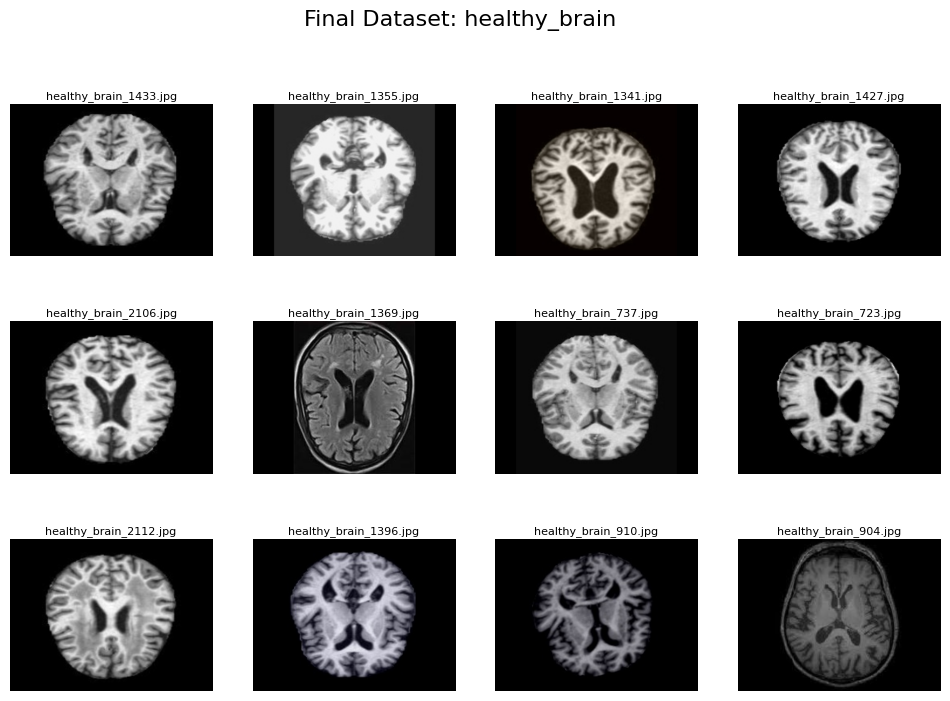

Displaying images from 'tumor_brain'...


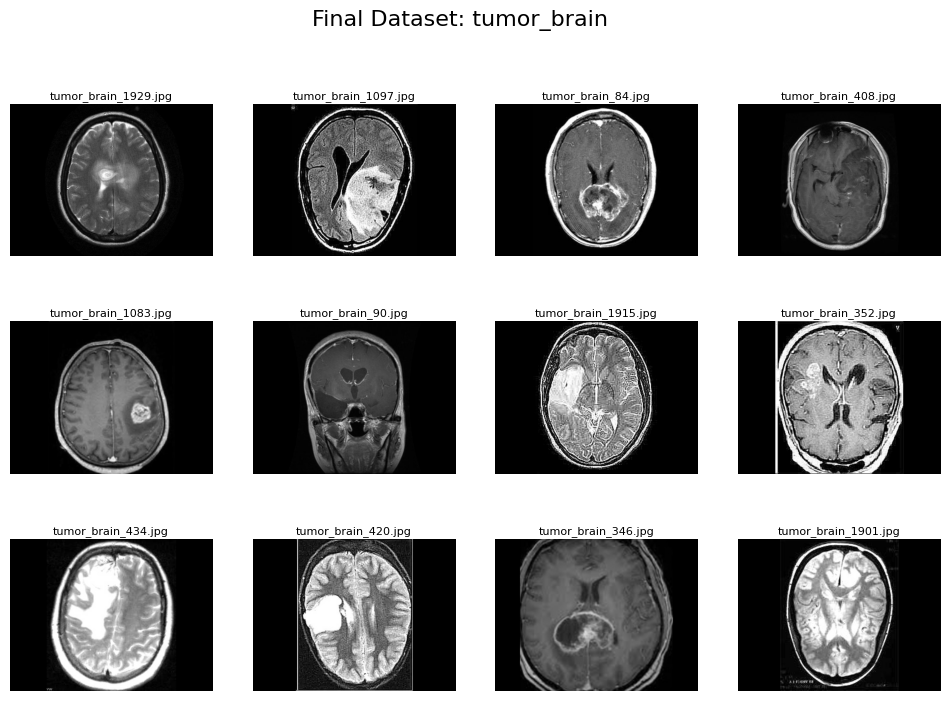

Displaying images from 'alzheimer_brain'...


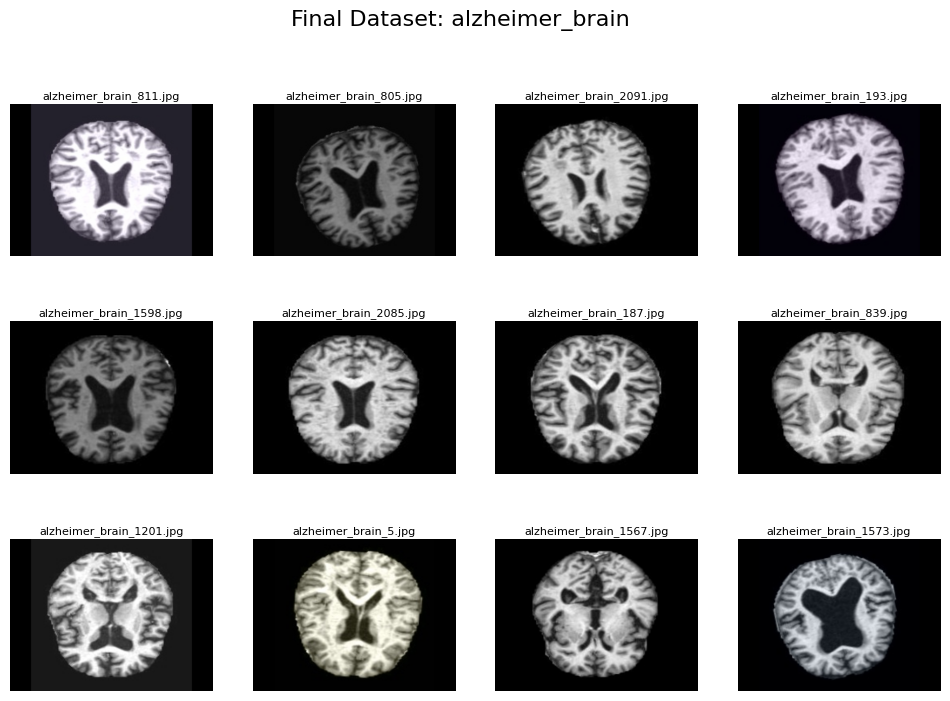

In [ ]:
# Define directories for the final dataset
final_dataset_dir = "final_dataset"
healthy_brain_final_dir = os.path.join(final_dataset_dir, "healthy_brain")
tumor_brain_final_dir = os.path.join(final_dataset_dir, "tumor_brain")
alzheimer_brain_final_dir = os.path.join(final_dataset_dir, "alzheimer_brain")

# Parameters for displaying images
n_images = 12  # Number of images to display
image_size = None  # Resize images to this size, or None to keep original size
figsize = (12, 8)

# Display images from the final dataset
categories = ["healthy_brain", "tumor_brain", "alzheimer_brain"]
for category in categories:
    category_dir = globals()[f"{category}_final_dir"]  # Dynamically get the directory
    if os.path.exists(category_dir) and os.listdir(category_dir):
        print(f"Displaying images from '{category}'...")
        display_images_from_directory(category_dir, title=f"Final Dataset: {category}", max_images=n_images, image_size=image_size, figsize=figsize)

#  Model Development

`Recap previous step:` In the previous step we worked to build our final dataset to be used. The final data structure is as following: 

    final_dataset/
    ├── healthy_brain/
    │   ├── healthy_brain_1.jpg
    │   ├── healthy_brain_2.jpg
    │   ├── healthy_brain_3.jpg
    │   └── ...
    ├── tumor_brain/
    │   ├── tumor_brain_1.jpg
    │   ├── tumor_brain_2.jpg
    │   ├── tumor_brain_3.jpg
    │   └── ...
    └── alzheimer_brain/
        ├── alzheimer_brain_1.jpg
        ├── alzheimer_brain_2.jpg
        ├── alzheimer_brain_3.jpg
        └── ...


Next, we are going now to  : 
- Build a model using tensorflow to classify MRI images according the classes
- Provide a sementic segmentation of the images classified to provide explainability
- Evaluate the carbone impact of the implementation of this project 

`Next steps`

1. **Build a Model Using TensorFlow:**
   - We will build a deep learning model using TensorFlow to classify MRI images according to the three classes: `healthy_brain`, `tumor_brain`, and `alzheimer_brain`.
   - The model will likely be a Convolutional Neural Network (CNN), which is well-suited for image classification tasks.

2. **Provide Semantic Segmentation for Explainability:**
   - To enhance the model's explainability, we will implement semantic segmentation to highlight the regions in the MRI images that contribute to the classification.
   - This can be achieved by using techniques such as Grad-CAM (Gradient-weighted Class Activation Mapping), which visualizes the areas of the image that the model focuses on for its predictions.

3. **Evaluate the Carbon Impact of the Implementation:**
   - We will assess the environmental impact, specifically the carbon footprint, of training and deploying the model. This will include considering the energy consumption of training the model, the hardware used, and the overall sustainability of the project.

 

### Building the Model using TensorFlow

In [ ]:
# Define directories for the final dataset
final_dataset_dir = "final_dataset"
healthy_brain_final_dir = os.path.join(final_dataset_dir, "healthy_brain")
tumor_brain_final_dir = os.path.join(final_dataset_dir, "tumor_brain")
alzheimer_brain_final_dir = os.path.join(final_dataset_dir, "alzheimer_brain")

In [ ]:
## Extracting images shape, since they have already been normalized
# from tensorflow.keras.preprocessing import image

# # Get the first image in the category to extract its shape
# sample_image_path = os.path.join(healthy_brain_final_dir, os.listdir(healthy_brain_final_dir)[5])

# # Load the image using Keras' image preprocessing utilities
# img = image.load_img(sample_image_path)

# # Convert the image to a numpy array and get the shape
# img_array = image.img_to_array(img)
# img_shape = img_array.shape  # (height, width, channels)

# print(f"Image shape: {img_shape}")


Image shape: (1446, 1920, 3)


#### Step 1: Loading, and splitting data into training and test sets

In [ ]:
healthy_brain_final_dir

'final_dataset/healthy_brain'

`⚠️ IMPORTANT` Uncomment the next cell to include all images in the dataset. This approach as been let aside because of computationnal power on my computer

In [ ]:
# # Define a Function to Load and Preprocess the Images
# def load_images_from_directory(directory, label, img_height=512, img_width=512):
#     images = []
#     labels = []
    
#     for filename in os.listdir(directory):
#         if filename.lower().endswith(('jpg', 'png', 'jpeg')):  # Check if file is an image
#             img_path = os.path.join(directory, filename)
            
#             # Load and resize the image
#             img = cv2.imread(img_path)
#             img = cv2.resize(img, (img_width, img_height))  # Resize to the target shape
#             images.append(img)
#             labels.append(label)  # Append the label (e.g., 0 for healthy_brain, 1 for tumor_brain, etc.)
    
#     return images, labels

# #  Load All the Images and Assign Labels

# # Load images for each category and assign corresponding labels
# healthy_brain_images, healthy_brain_labels = load_images_from_directory(healthy_brain_final_dir, 0)
# tumor_brain_images, tumor_brain_labels = load_images_from_directory(tumor_brain_final_dir, 1)
# alzheimer_brain_images, alzheimer_brain_labels = load_images_from_directory(alzheimer_brain_final_dir, 2)

# # Combine the data from all categories
# X = np.array(healthy_brain_images + tumor_brain_images + alzheimer_brain_images)
# y = np.array(healthy_brain_labels + tumor_brain_labels + alzheimer_brain_labels)


In [ ]:
# Define a Function to Load and Preprocess the Images with a Limit on Number of Images
def load_images_from_directory(directory, label, num_images=None, img_height=512, img_width=512):
    images = []
    labels = []
    filenames = []

    # List all files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('jpg', 'png', 'jpeg'))]

    # Limit the number of images if `num_images` is provided
    if num_images is not None:
        image_files = random.sample(image_files, min(len(image_files), num_images))  # Randomly sample the required number of images

    for filename in image_files:
        img_path = os.path.join(directory, filename)

        # Load and resize the image
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))  # Resize to the target shape
        images.append(img)
        labels.append(label)
        filenames.append(filename)

    return images, labels, filenames

# Define the number of images to load for each class
num_images_per_class = 800  # Change this to the number of images you want for each class

# Load All the Images and Assign Labels

# Load images for each category and assign corresponding labels, limiting the number of images
healthy_brain_images, healthy_brain_labels, healthy_brain_filenames = load_images_from_directory(healthy_brain_final_dir, 0, num_images=num_images_per_class)
tumor_brain_images, tumor_brain_labels, tumor_brain_filenames = load_images_from_directory(tumor_brain_final_dir, 1, num_images=num_images_per_class)
alzheimer_brain_images, alzheimer_brain_labels, alzheimer_brain_filenames = load_images_from_directory(alzheimer_brain_final_dir, 2, num_images=num_images_per_class)

# Combine the data from all categories
X = np.array(healthy_brain_images + tumor_brain_images + alzheimer_brain_images)
y = np.array(healthy_brain_labels + tumor_brain_labels + alzheimer_brain_labels)
X_train_filenames = healthy_brain_filenames + tumor_brain_filenames + alzheimer_brain_filenames

# Print shapes to check
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train_filenames length:", len(X_train_filenames))


X shape: (2400, 512, 512, 3)
y shape: (2400,)
X_train_filenames length: 2400


In [ ]:
X.shape

(2400, 512, 512, 3)

#### Step 3: Normalize the Images and One-Hot Encode the Labels

It’s a good practice to normalize the image data to the range [0, 1].

In [ ]:
X = X.astype('float32') / 255.0  # Normalize pixel values to [0, 1]



In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=3)  # 3 classes (healthy, tumor, alzheimer)

#### Step 3: Split the Data into Training and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (1920, 512, 512, 3)
Training labels shape: (1920,)
Validation data shape: (480, 512, 512, 3)
Validation labels shape: (480,)


### Setting up the architecture (model configuration)

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Define image size and batch size
img_height = 512
img_width = 512
batch_size = 32
num_classes = 3  # Healthy, Tumor, Alzheimer

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to avoid overfitting
    
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model with the Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Optimizer with learning rate
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)

# Display the model summary to check architecture
model.summary()


/Users/jonathan/Documents/École/Paris 8/S1/Outils de programmation avancée pour l’IA/.tf_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,073,859 (240.61 MB)

 Trainable params: 63,073,859 (240.61 MB)

 Non-trainable params: 0 (0.00 B)

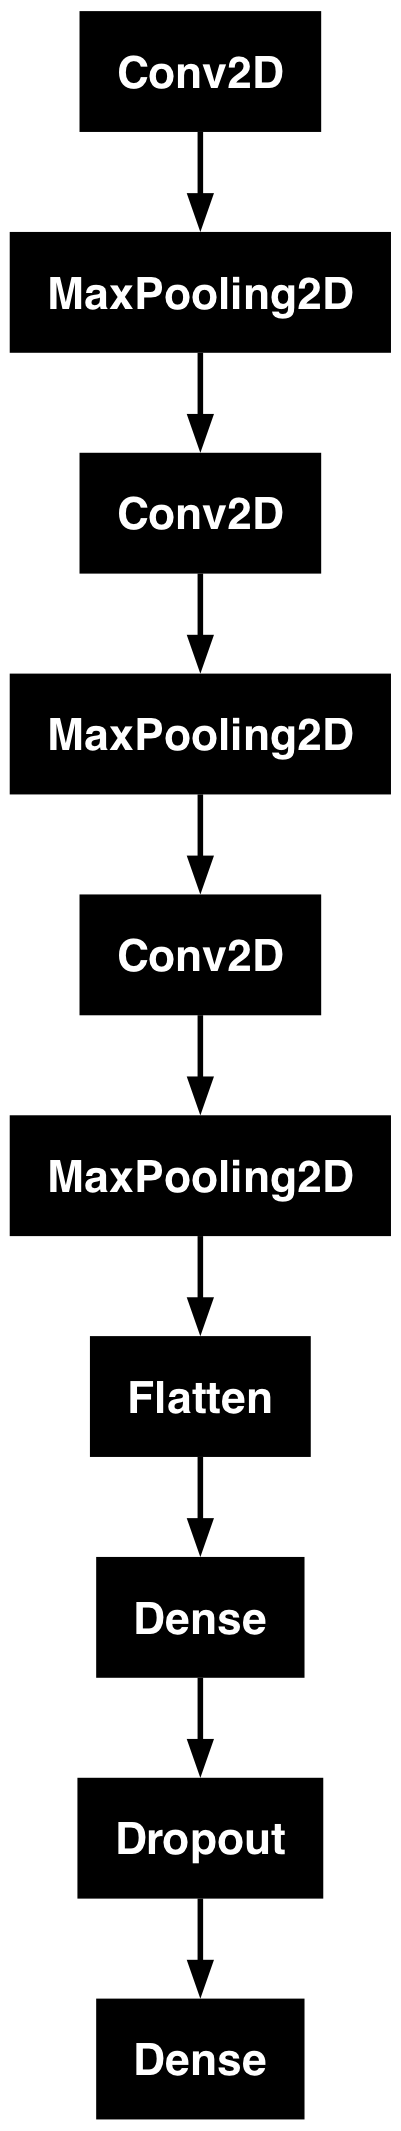

In [ ]:
keras.utils.plot_model(model)

### Model Training

In this step, we will:

- Train the model using the training set.
- Display the loss and accuracy curves during training.
- Use cross-validation to adjust hyperparameters and monitor overfitting.
- Implement regularization (dropout, L2 regularization) and optimization techniques.

In [ ]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=20,         # Set the number of epochs
    batch_size=batch_size,  # Set batch size
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping]  # Early stopping callback
)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 376s 6s/step - accuracy: 0.5414 - loss: 3.0082 - val_accuracy: 0.6875 - val_loss: 0.6283
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 396s 7s/step - accuracy: 0.6933 - loss: 0.5958 - val_accuracy: 0.7104 - val_loss: 0.5926
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 391s 6s/step - accuracy: 0.7510 - loss: 0.4950 - val_accuracy: 0.7563 - val_loss: 0.5150
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 434s 7s/step - accuracy: 0.7877 - loss: 0.4280 - val_accuracy: 0.7396 - val_loss: 0.5417
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 474s 8s/step - accuracy: 0.8334 - loss: 0.3748 - val_accuracy: 0.7521 - val_loss: 0.5558
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 529s 9s/step - accuracy: 0.8804 - loss: 0.2890 - val_accuracy: 0.7771 - val_loss: 0.5035
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 556s 9s/step - accuracy: 0.8889 - loss: 0.2614 - val_accuracy: 0.7750 - val_loss: 0.5868
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 461s 8s/step - accuracy: 0.9027 - loss: 0.2131 - val_accuracy: 0.7646 - v

In [ ]:
# Save the trained model
# model.save('models/brain_mri_classifier.h5') ## This one is considered legacy
model.save('models/brain_mri_classifier.keras')

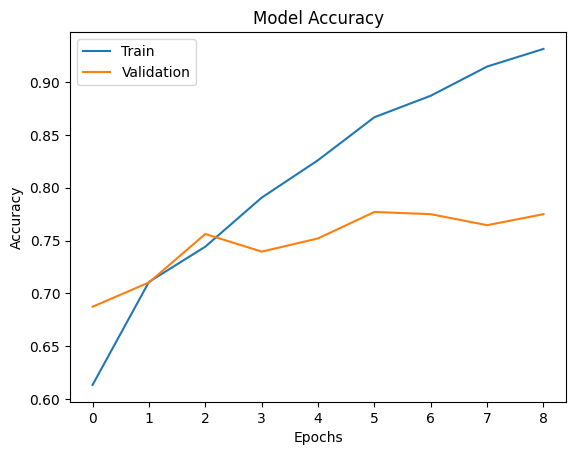

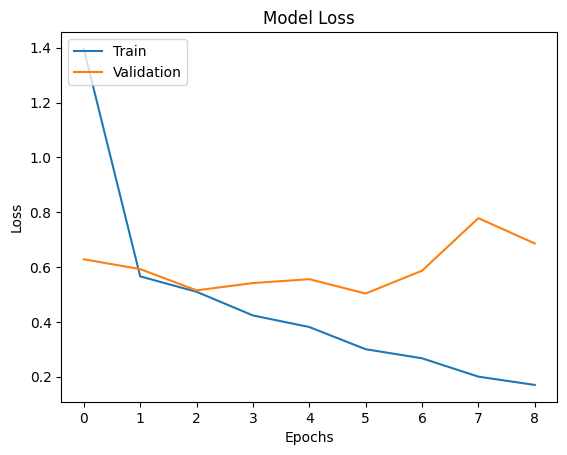

In [ ]:
# Plotting loss and accuracy
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_training_history(history)

###  Model Evaluation
In this step, we will:

- Calculate evaluation metrics like accuracy, recall, precision, F1-score, and AUC for classification.
- Visualize results with confusion matrices and ROC curves.

In [ ]:
def load_test_images(directory, label, excluded_filenames, num_images, img_height=512, img_width=512):
    """Loads a specified number of test images from a directory, excluding those in the excluded list.

    Args:
        directory: The directory containing the images.
        label: The label to assign to the images.
        excluded_filenames: A list of filenames to exclude.
        num_images: The desired number of test images.
        img_height: The desired height of the images.
        img_width: The desired width of the images.

    Returns:
        A tuple of (images, labels).
    """

    images = []
    labels = []
    filenames = []

    # Get a list of all image filenames in the directory, excluding excluded ones
    all_filenames = [f for f in os.listdir(directory) if f.lower().endswith(('jpg', 'png', 'jpeg')) and f not in excluded_filenames]

    # Randomly sample the desired number of images from the remaining filenames
    sampled_filenames = random.sample(all_filenames, min(num_images, len(all_filenames)))

    for filename in sampled_filenames:
        img_path = os.path.join(directory, filename)

        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))
        images.append(img)
        labels.append(label)
        filenames.append(img_path)
    return images, labels, filenames

# excluding already seen images of the training set
excluded_filenames = [filename.split('/')[-1] for filename in X_train_filenames]  

# Specify the desired number of test images per class
num_test_images_per_class = 50

# Load test images, excluding those used in training and sampling the desired number
healthy_brain_test_images, healthy_brain_test_labels, healthy_brain_test_filenames = load_test_images(healthy_brain_final_dir, 0, excluded_filenames, num_test_images_per_class)
tumor_brain_test_images, tumor_brain_test_labels, tumor_brain_test_filenames = load_test_images(tumor_brain_final_dir, 1, excluded_filenames, num_test_images_per_class)
alzheimer_brain_test_images, alzheimer_brain_test_labels, alzheimer_brain_test_filenames = load_test_images(alzheimer_brain_final_dir, 2, excluded_filenames, num_test_images_per_class)

# Combine the test data
X_test = np.array(healthy_brain_test_images + tumor_brain_test_images + alzheimer_brain_test_images)
y_test = np.array(healthy_brain_test_labels + tumor_brain_test_labels + alzheimer_brain_test_labels)
X_test_filenames = healthy_brain_test_filenames + tumor_brain_test_filenames + alzheimer_brain_test_filenames

X_test = X_test.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
# y_test = to_categorical(y_test, num_classes=3) 

y_labels = {
    0: 'healthy_brain',
    1: 'tumor_brain',
    2: 'alzheimer_brain'
}

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (150, 512, 512, 3)
y_test shape: (150,)


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7645 - loss: 0.4577
Test Loss: 0.3936878442764282
Test Accuracy: 0.8066666722297668
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 997ms/step
F3 Score (weighted): 0.8060
              precision    recall  f1-score   support

           0       0.74      0.64      0.69        50
           1       0.98      0.98      0.98        50
           2       0.70      0.80      0.75        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



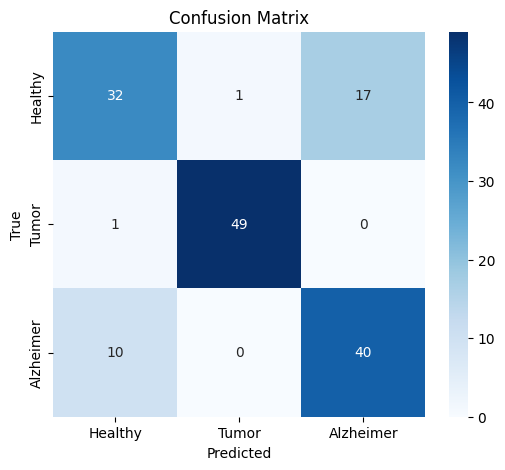

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, fbeta_score
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = tf.argmax(y_test, axis=1)  # True labels

# Compute F3 score
f3_score = fbeta_score(y_true, y_pred_classes, beta=3, average='weighted')
print(f"F3 Score (weighted): {f3_score:.4f}")

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Healthy", "Tumor", "Alzheimer"], yticklabels=["Healthy", "Tumor", "Alzheimer"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


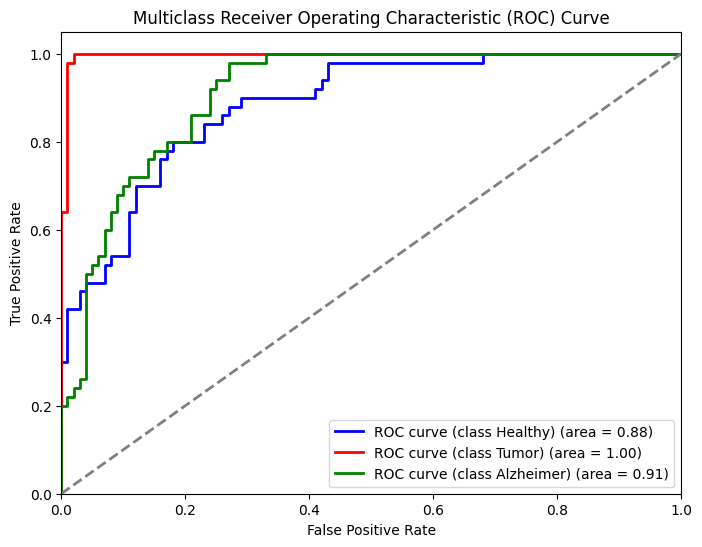

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels for multiclass ROC
n_classes = y_pred.shape[1]  # Number of classes
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Initialize variables for plotting
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Use distinct colors for each class
class_names = ["Healthy", "Tumor", "Alzheimer"]

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve (class {class_names[i]}) (area = {roc_auc[i]:0.2f})")

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Semantic Segmentation for Explainability

Our explainability section is going to consist in using `Grad-CAM` heatmap to visualize the regions that the model has been focusing on to classify MRI images.

In [ ]:
def grad_cam(model, img_array, last_conv_layer_name, output_layer_name, class_idx=None):
    # Build a Grad-CAM model with required intermediate layers
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[
            model.get_layer(last_conv_layer_name).output,  # Feature maps
            model.get_layer(output_layer_name).output,     # Final predictions
        ]
    )

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])  # Default to predicted class
        loss = predictions[:, class_idx]  # Target class score

    # Compute gradients of the target class wrt feature maps
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the feature maps by the pooled gradients
    conv_outputs = conv_outputs[0]
    for i in range(conv_outputs.shape[-1]):
        conv_outputs = tf.multiply(conv_outputs, pooled_grads[i])


    # Create the heatmap
    heatmap = tf.reduce_mean(conv_outputs, axis=-1).numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Resize heatmap to the original image size
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    overlay = cv2.addWeighted(heatmap, 0.4, (img_array[0] * 255).astype(np.uint8), 0.6, 0)

    return overlay


In [ ]:
def display_gradcam_for_images(file_paths, model, last_conv_layer_name, output_layer_name, img_height=512, img_width=512):
    for image_path in file_paths:
        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Generate Grad-CAM overlay
        overlay = grad_cam(model, img_array, last_conv_layer_name, output_layer_name)

        # Display the original image and overlay
        plt.figure(figsize=(12, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(overlay)
        plt.title("Grad-CAM Overlay")
        plt.axis("off")

        plt.show()


/Users/jonathan/Documents/École/Paris 8/S1/Outils de programmation avancée pour l’IA/.tf_env/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(
/var/folders/bw/99zpkjs138d1s9g1c411hty80000gn/T/ipykernel_7977/1980638454.py:31: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
/var/folders/bw/99zpkjs138d1s9g1c411hty80000gn/T/ipykernel_7977/1980638454.py:35: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


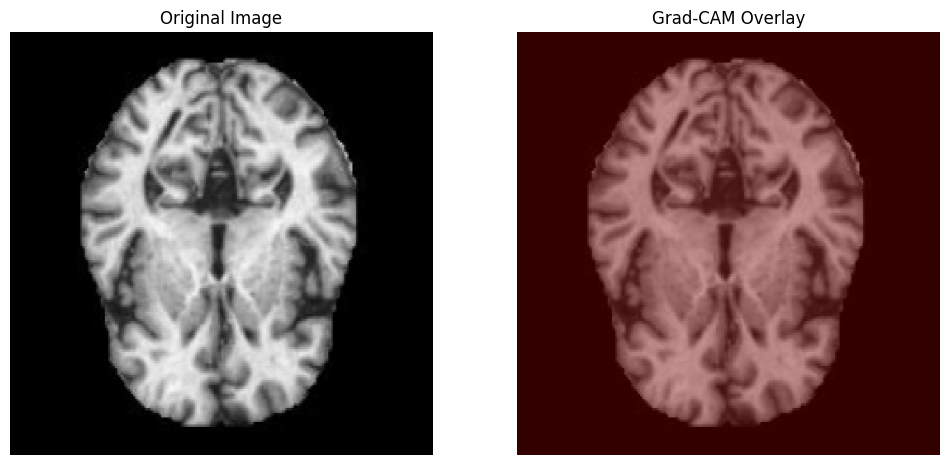

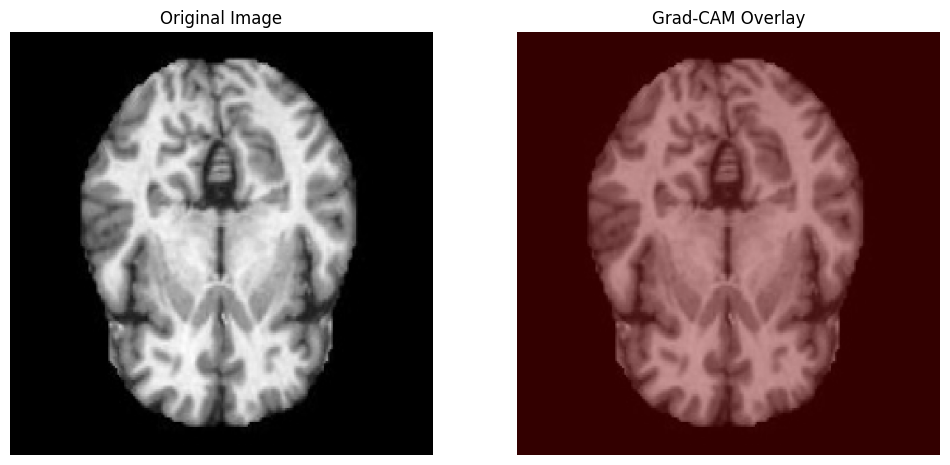

In [ ]:
display_gradcam_for_images(
    file_paths=X_test_filenames[:2], 
    model=model, 
    last_conv_layer_name='conv2d_2',  # Last convolutional layer
    output_layer_name='dense_1',     # Final dense output layer
    img_height=512, 
    img_width=512
)


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Get the predicted class for the first image
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {y_labels[predicted_class]}")

# Select the first image from X_test
img = X_test[0]  # Change the index to select a different image


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Predicted class: healthy_brain


/Users/jonathan/Documents/École/Paris 8/S1/Outils de programmation avancée pour l’IA/.tf_env/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: [['keras_tensor']]. Received: the structure of inputs=*
  warnings.warn(


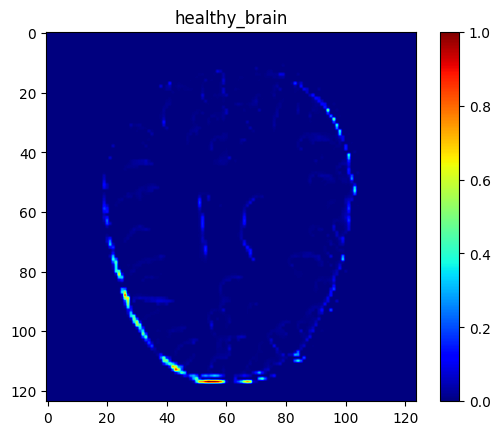

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Grad-CAM
def grad_cam(model, img_array, last_conv_layer_name, output_layer_name):
    # Convert image to batch of 1 image
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

    # Create a model to output feature maps and predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.get_layer(output_layer_name).output]
    )

    with tf.GradientTape() as tape:
        tape.watch(img_array)
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]

    # Compute the gradients of the loss with respect to the convolutional layer output
    grads = tape.gradient(loss, conv_outputs)

    # Pool the gradients across all the axes (to get the importance of each feature map)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the pooled gradients with the convolutional layer output using tf.multiply
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads  # Apply gradients directly

    # Create the heatmap by averaging across the feature maps
    heatmap = np.mean(conv_outputs, axis=-1)

    # Normalize the heatmap between 0 and 1
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Generate Grad-CAM heatmap for the selected image
heatmap = grad_cam(model, img, 'conv2d_2', 'dense_1')

# Plot the heatmap
plt.imshow(heatmap, cmap='jet')
plt.title(y_labels[predicted_class])
plt.colorbar()
plt.show()


### Visualizing model explainability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


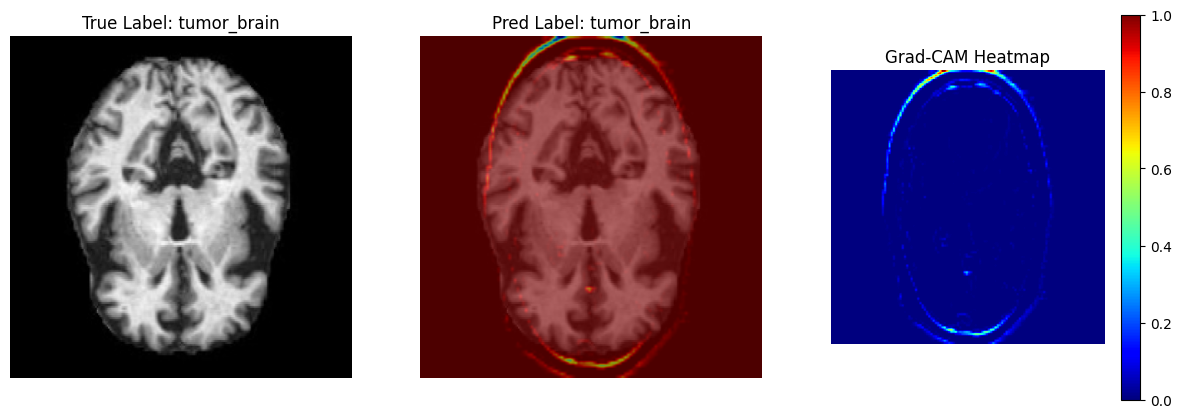

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


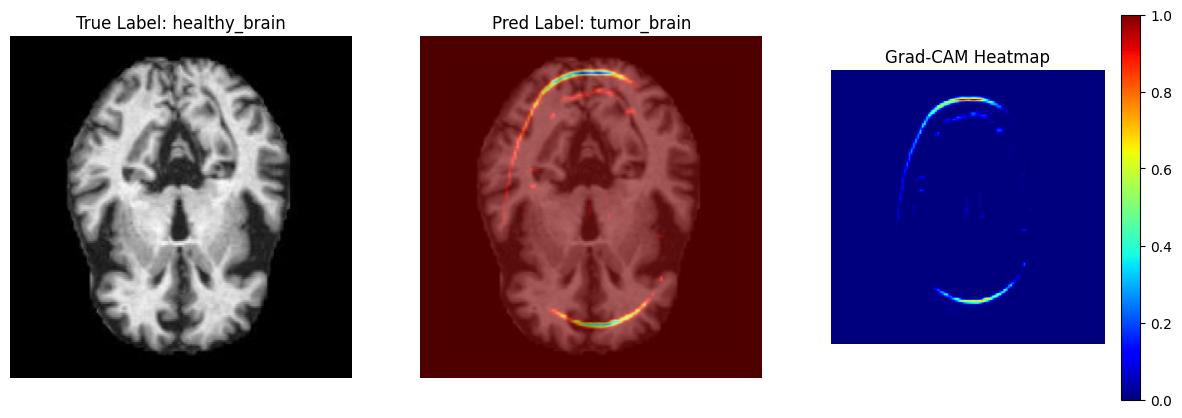

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


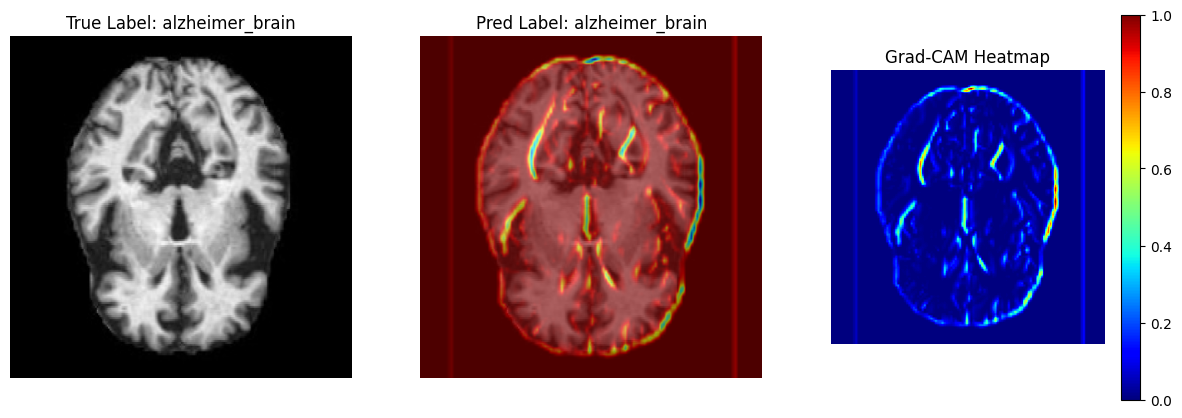

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


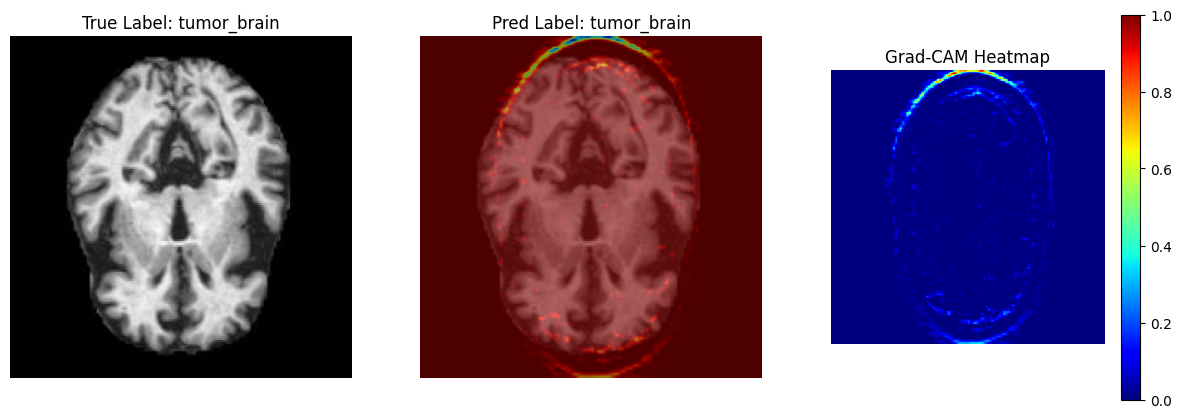

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


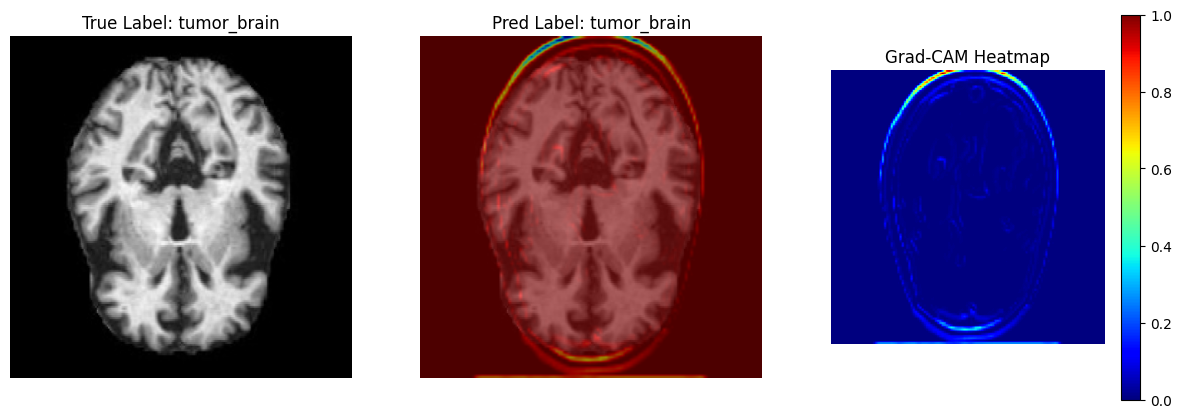

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


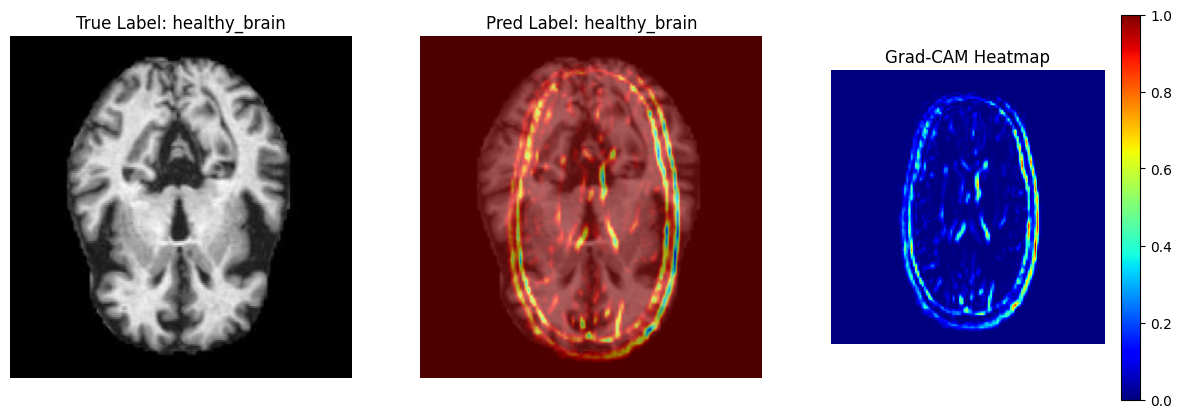

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


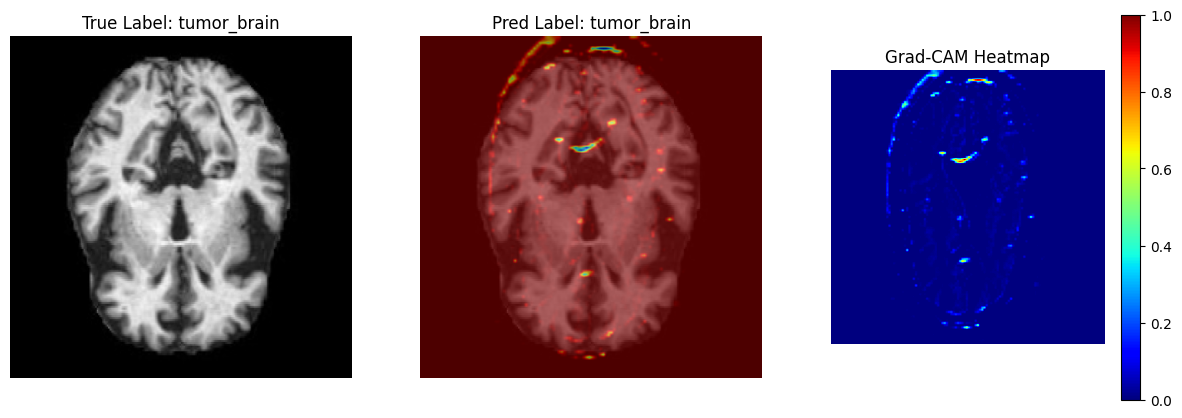

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


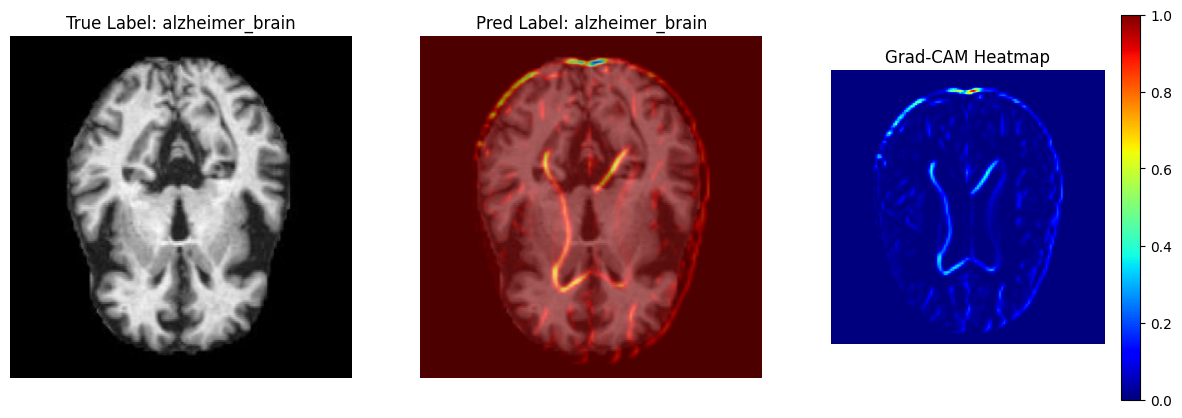

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


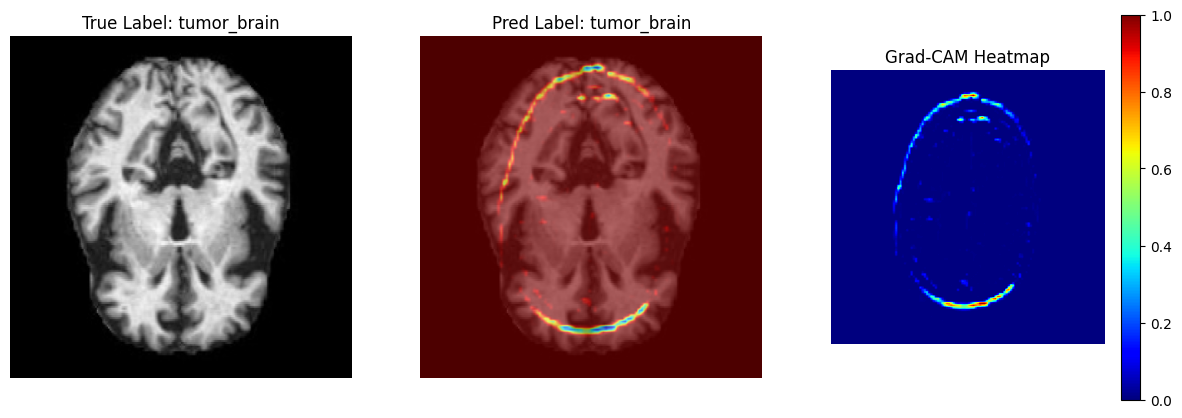

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


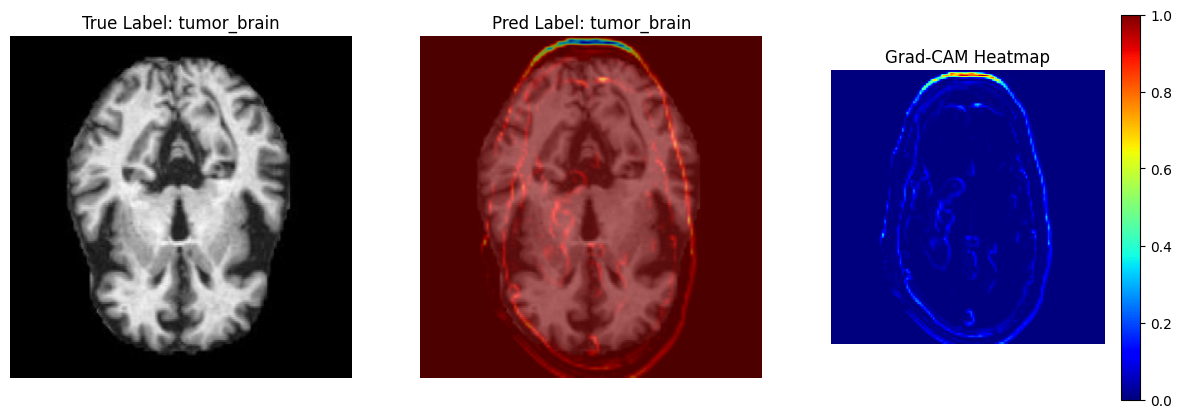

In [ ]:
# Generate Grad-CAM for a batch of images (for example, 5 images)
from sklearn.utils import shuffle

# Shuffle X_test and y_test
X_test_shuffled, y_test_shuffled = shuffle(X_test, y_test, random_state=42)

for i in range(10):  # Modify the range as needed
    img = X_test_shuffled[i]
    true_label = y_test_shuffled[i]
    true_label = y_labels[true_label] # True labels
    
    # Generate the Grad-CAM heatmap
    heatmap = grad_cam(model, img, 'conv2d_2', 'dense_1')

    # Resize the heatmap to match the image size
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # Convert the heatmap to uint8 for visualization
    heatmap_display = np.uint8(255 * heatmap_resized)
    heatmap_display = cv2.applyColorMap(heatmap_display, cv2.COLORMAP_JET)
    
    # Convert the image to uint8 if it is in float32 format (e.g., range [0, 1])
    # img_display = np.uint8(255 * img) if img.max() <= 1 else img  # Rescale image if in range [0, 1]

    # Superimpose the heatmap on the image
    superimposed_img = cv2.addWeighted(heatmap_display, 0.6, img_display, 0.4, 0)

    # Predict the label for the image
    pred_prob = model.predict(np.expand_dims(img, axis=0))  # Add batch dimension
    pred_label = y_labels[np.argmax(pred_prob)]  # Get predicted label (index of highest probability)
    
    # Display the results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Display original image with true label
    ax[0].imshow(img_display)
    ax[0].set_title(f"True Label: {true_label}")
    ax[0].axis('off')

    # Display Grad-CAM explained image
    ax[1].imshow(superimposed_img)
    ax[1].set_title(f"Pred Label: {pred_label}")
    ax[1].axis('off')

    # Display Grad-CAM heatmap
    ax[2].imshow(heatmap_display)
    ax[2].set_title("Grad-CAM Heatmap")
    ax[2].axis('off')
    # Plot the heatmap
    plt.imshow(heatmap, cmap='jet')
    plt.colorbar()
    plt.show()


### `📝 Interpretation comment:`

In a Grad-CAM (Gradient-weighted Class Activation Mapping) visualization, the color variation in the heatmap (typically shown as a heatmap overlay on top of the original image) indicates the intensity of the model's attention or focus on different regions of the image when making a prediction. The colors variation can be interpreted as following :

`Color Mapping Interpretation:`
1. **Red and Yellow (Warm Colors)**:
   - **Meaning**: Areas that are highlighted in **red** and **yellow** in the Grad-CAM heatmap represent regions where the model has assigned the **most attention** or **importance** for the decision it made.
   - **Interpretation**: The higher the intensity of red or yellow, the more important that region was for the model's prediction. These are the areas the model "focused on" to make its classification decision.

2. **Blue and Green (Cool Colors)**:
   - **Meaning**: Areas in **blue** and **green** represent regions that the model considered **less important** or had **lower activation** during the prediction.
   - **Interpretation**: These areas are less relevant to the decision-making process for the particular class being predicted. The model may have "ignored" these regions when classifying the image.

`Interpreting the Grad-CAM Overlay:`
- **Heatmap Overlay**: The heatmap is usually overlaid on the original image. When you observe the overlay, regions in the image corresponding to the warm colors (red, yellow) show where the model is focusing its attention to make a particular prediction. These are the parts of the image that the model considers significant for that class.
  
- **Visual Focus**: For example, in an image of a cat, if the head and eyes of the cat are marked in warm colors, the model is likely focusing on those areas for classifying the image as a "cat." If the background or irrelevant areas are in cool colors, the model is less reliant on those regions for the prediction.

`How to Use This Interpretation`:
1. **Model Explainability**: This helps in understanding why the model classified an image as it did. If the model highlights relevant regions, this shows the model’s decision-making process is reasonable. If the heatmap highlights irrelevant areas (e.g., the background of an image when predicting), this can indicate that the model might not be learning the right features and may need further training or adjustments to improve performance.

2. **Attention Mapping**: Since Grad-CAM provides insight into which parts of the image are more influential for a particular class prediction, this can help identify areas where the model might be overfitting or underfitting.
  

`Next step:` The next step I wanted to explore in this work was to assess the environmental impact of the implementation of my project, but my laptop is not sharing my point of view, thus this will be the work of another project. 


## Evaluating Carbon Impact

To estimate the carbon impact, we need to calculate the energy consumption during model training. We can to this with the `code carbon library`. 


## `Summary:`
- **Warm colors (red/yellow)**: Areas of high importance to the model’s decision.
- **Cool colors (blue/green)**: Areas of low importance.
- **Purpose**: Grad-CAM helps understand and interpret the model's focus, improving model explainability and diagnosing potential issues in model learning.
- **Model performance evaluation**: If the Grad-CAM highlights irrelevant areas (like the background), this may suggest the model has learned to focus on non-essential features, which could be problematic.


Due to the limited computing power of my machine, I was unable to train a more robust or fine-tuned model, as each attempt resulted in a kernel crash. This also led to a reduction in the dataset sample size when transitioning to the training phase.

While the model’s performance would not be acceptable for critical applications like healthcare treatment (where an accuracy rate of 95% is typically required), it still highlights patterns that could potentially be useful to medical professionals. However, since we are not doctors, we can only describe what we observe rather than derive medical insights.

Ultimately, the main objective of this project was not to maximize accuracy but to focus on the MLOps aspects, including data structuring, model deployment, and workflow automation. This work provides a foundation for integrating machine learning models into production pipelines, ensuring scalability and reproducibility.